# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


## STEP 1 IMPORT LIBRARIES AND DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [6]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data) #to train the model
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data) #Validation dataset is used to avoid overfitting
    #Every epoch we show the model,the validation dataset
    #So that model doesnt end up overfitting 
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data) #never been seen by model,during training

In [7]:
X_train,y_train=train['features'],train['labels']
X_Validation,y_Validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [9]:
X_train.shape #Length is 32 , bredth is 32 ie 32*32 pixels image 
#3 RGB Colors , depth
#34800 pics

(34799, 32, 32, 3)

In [10]:
y_train.shape #Labels for x train

(34799,)

In [12]:
y_Validation.shape

(4410,)

In [13]:
X_test.shape

(12630, 32, 32, 3)

In [14]:
y_test.shape

(12630,)

## STEP 2 IMAGE EXPLORATION

Text(0.5, 1.0, '11')

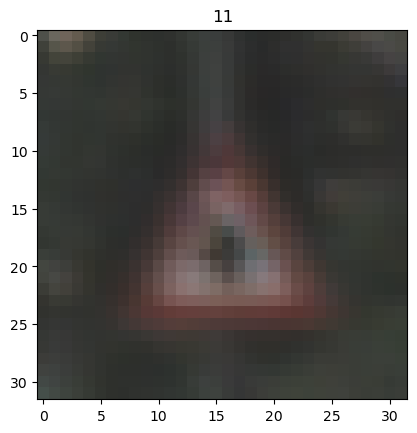

In [29]:
i = 9000
plt.imshow(X_train[i])
plt.title(y_train[i])

Text(0.5, 1.0, '38')

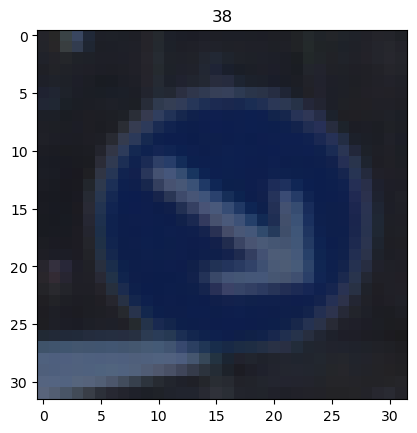

In [30]:
i = 2000
plt.imshow(X_Validation[i])
plt.title(y_Validation[i])

Text(0.5, 1.0, '17')

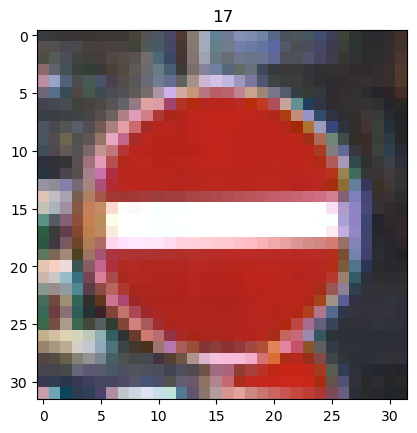

In [31]:
i = 1000
plt.imshow(X_test[i])
plt.title(y_test[i])

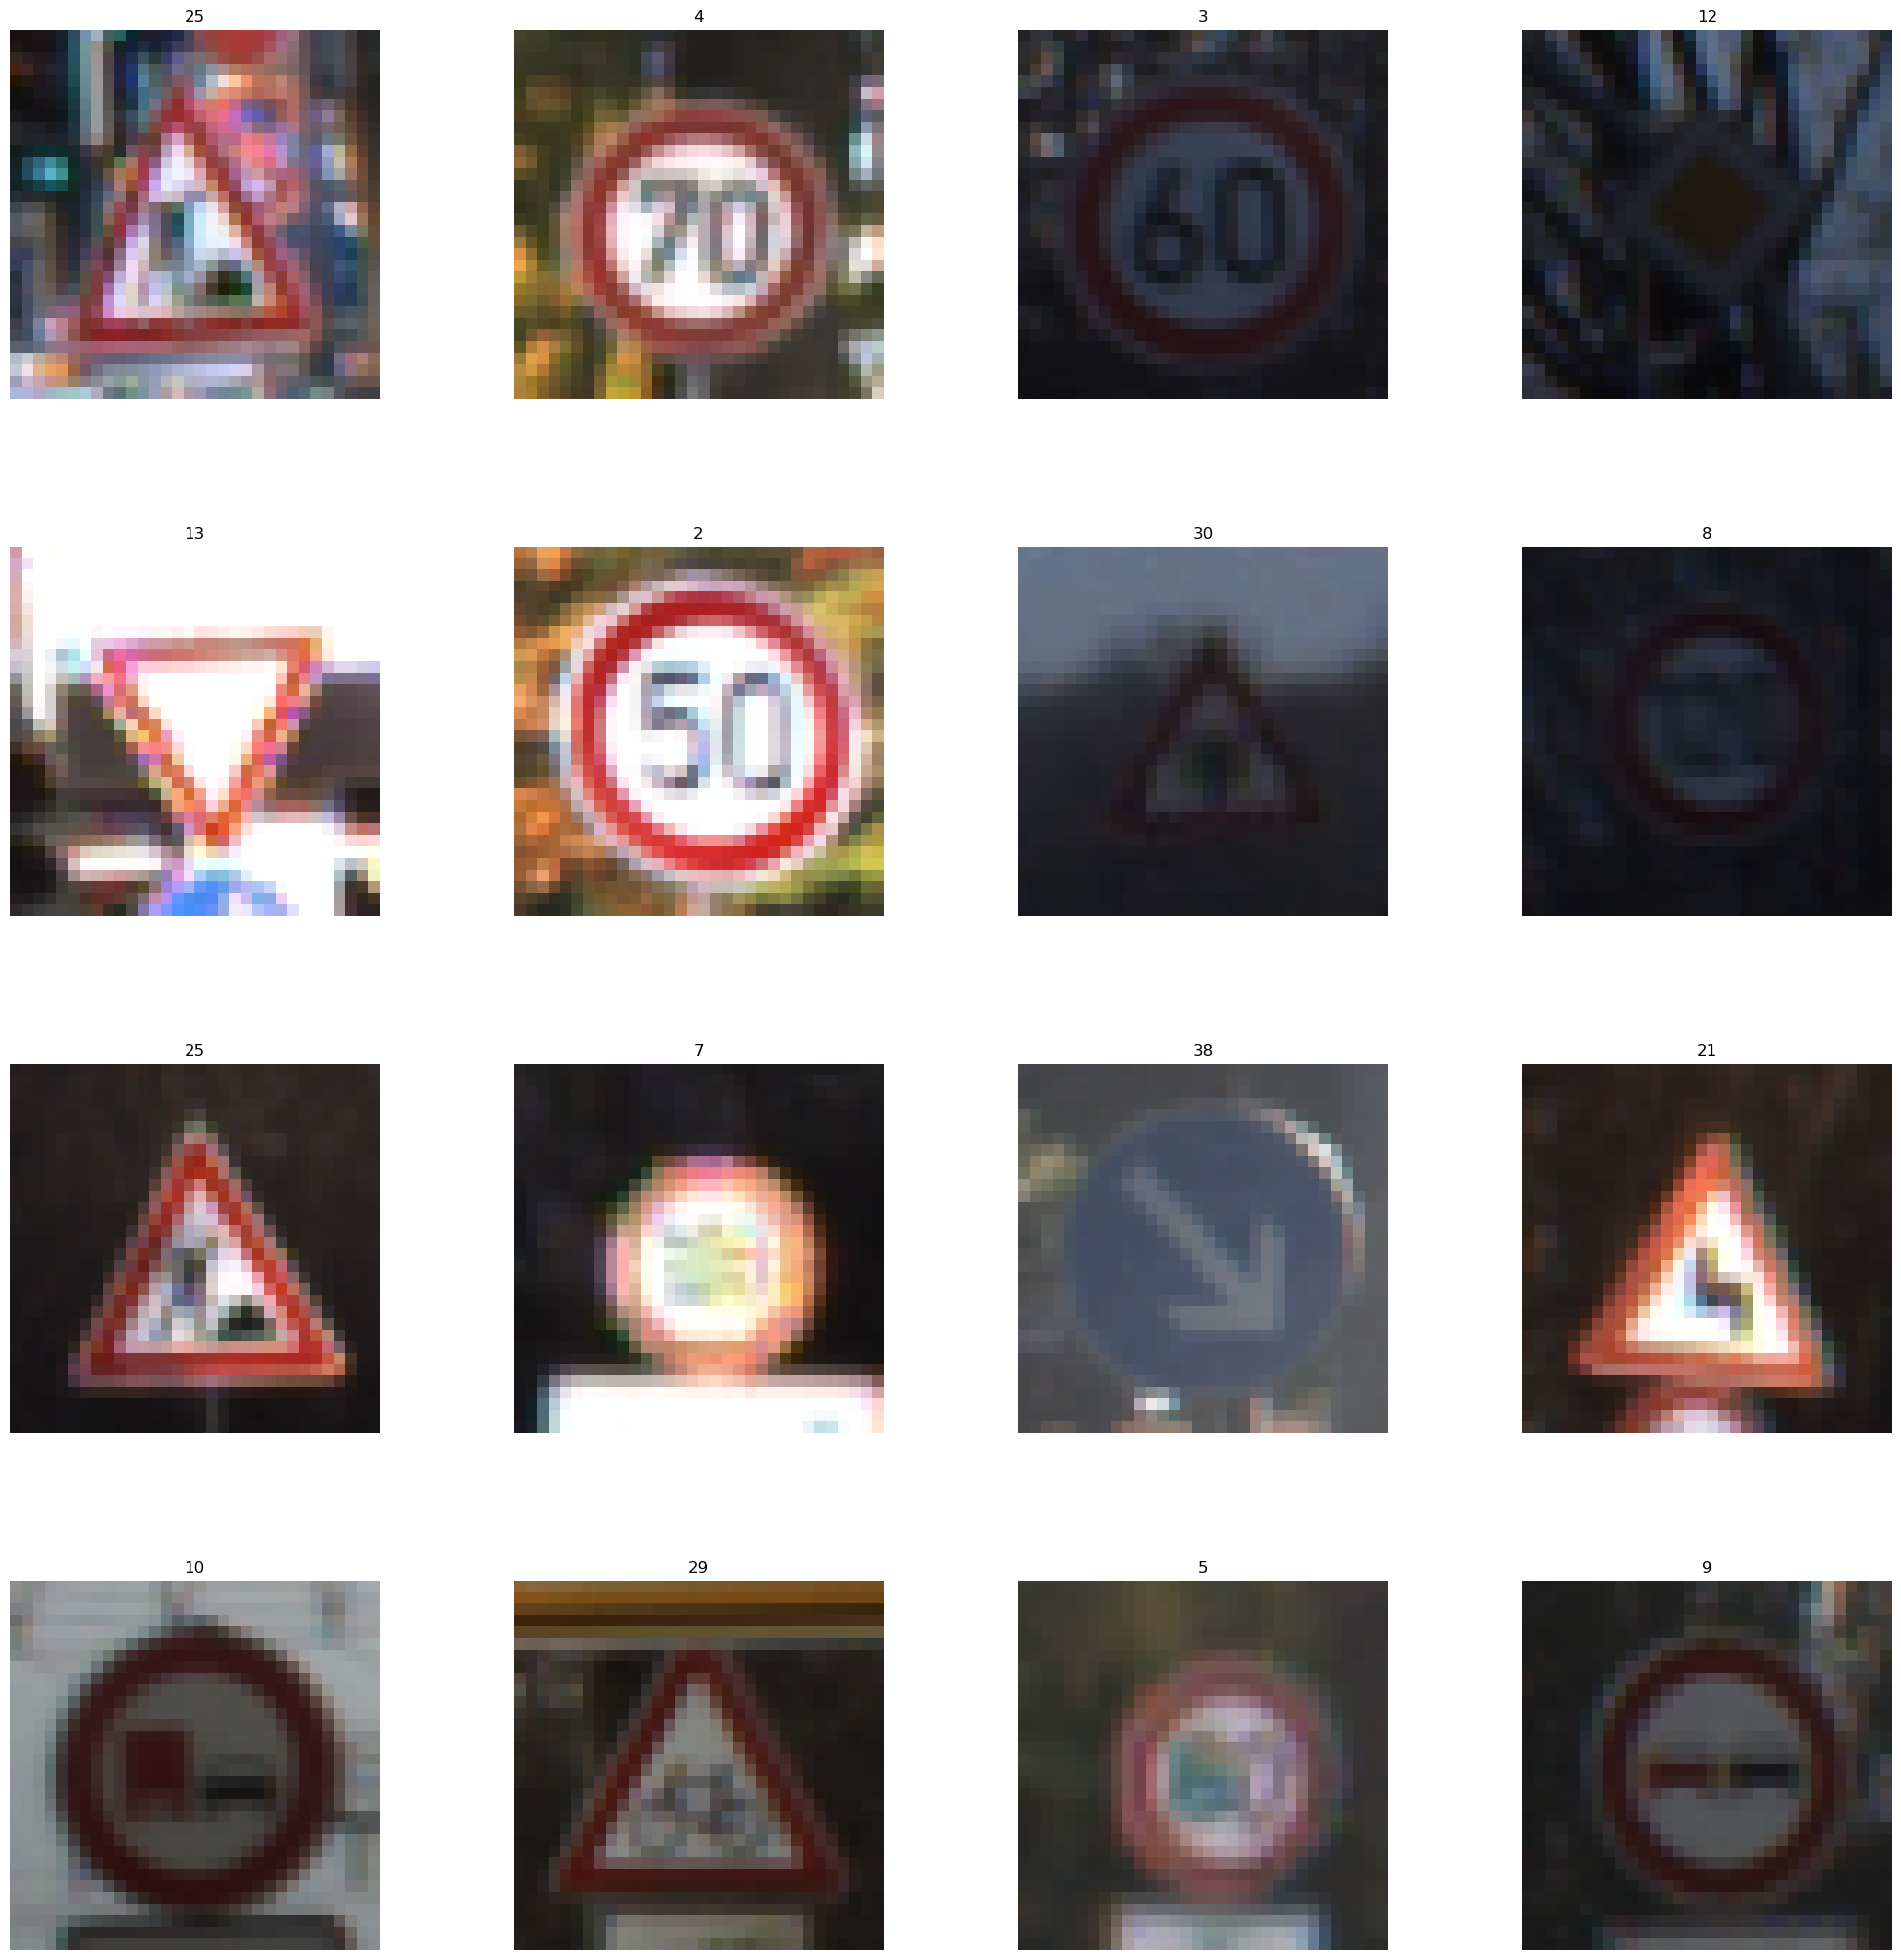

In [37]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

## STEP 3 DATA PREPARATION

In [39]:
#Shuffling the order of images because similar images are collected together, that is not good
from sklearn.utils import shuffle 
X_train,y_train=shuffle(X_train,y_train)

In [91]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)


In [82]:
X_train_gray.shape

(34799, 32, 32, 1)

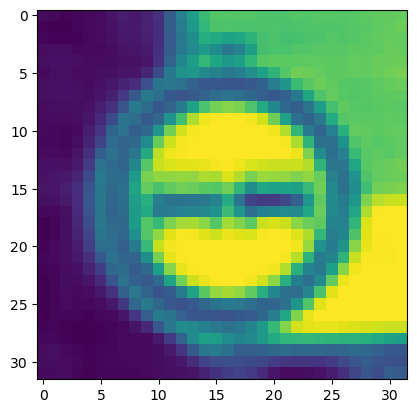

In [42]:
plt.imshow(X_train_gray[1000])

In [90]:
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_Validation_gray=np.sum(X_Validation/3,axis=3,keepdims=True)



In [89]:
#Now we'll be Normalising the dataset!

X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_Validation_gray_norm=(X_Validation_gray-128)/128




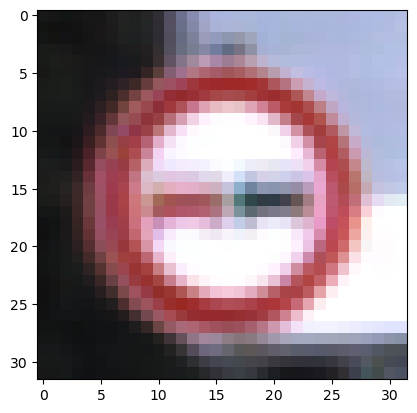

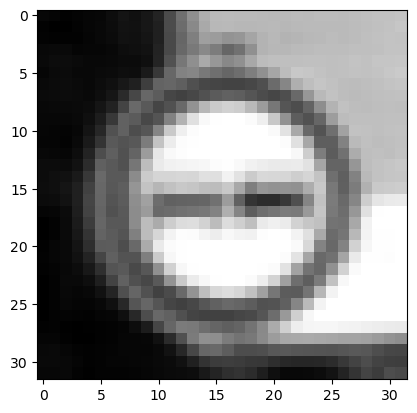

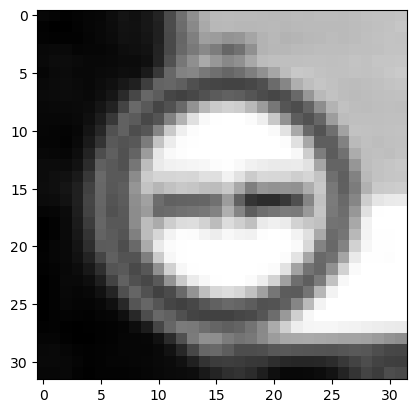

In [50]:
i=1000
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

#cmap will change the colors to gray scale as we are visualising Gray Scale image
#Squeeze will change the dimensions frm 32,32,1 to just 32,32

## STEP 4 LE NET Model Training 

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
  
  After Convolution
    - Output = 28x28x6
    - Output = **(Input-filter+1)/Stride => (32-5+1)/1=28**
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [54]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [75]:

model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# First fully connected layer
model.add(Dense(units=120, activation='relu'))

# Second fully connected layer
model.add(Dense(units=84, activation='relu'))

# Output layer with softmax activation (for 43 classes)
model.add(Dense(units=43, activation='softmax'))

# Summary of the model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [128]:
history=model.fit(X_train_gray_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(X_Validation_gray_norm,y_Validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9758 - loss: 0.0981 - val_accuracy: 0.8415 - val_loss: 0.6938
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9755 - loss: 0.0967 - val_accuracy: 0.8517 - val_loss: 0.6563
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9807 - loss: 0.0854 - val_accuracy: 0.8356 - val_loss: 0.7207
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9801 - loss: 0.0808 - val_accuracy: 0.8490 - val_loss: 0.6844
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9818 - loss: 0.0756 - val_accuracy: 0.8440 - val_loss: 0.7106
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9825 - loss: 0.0684 - val_accuracy: 0.8458 - val_loss: 0.7366
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9848 - loss: 0.0611 - val_accuracy: 0.8578 - val_loss: 0.6694
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9857 - loss: 0.0598 - val_accuracy: 0.8615 -

## STEP 5 Evaluating the Model

In [129]:
score=model.evaluate(X_test_gray_norm,y_test)
print("Test accuracy :{}".format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8721 - loss: 1.3212
Test accuracy :0.8761678338050842


In [130]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [131]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']


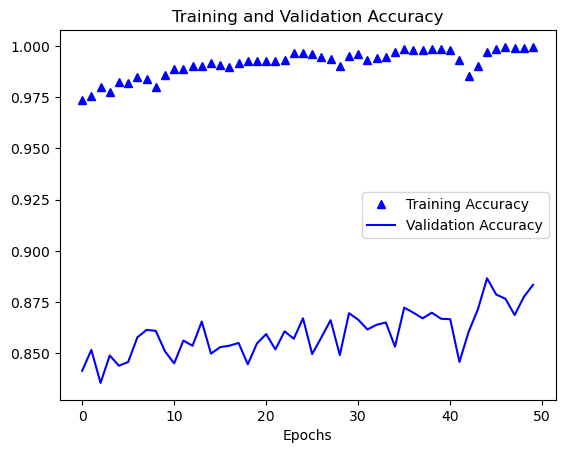

In [132]:
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b^',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.legend()

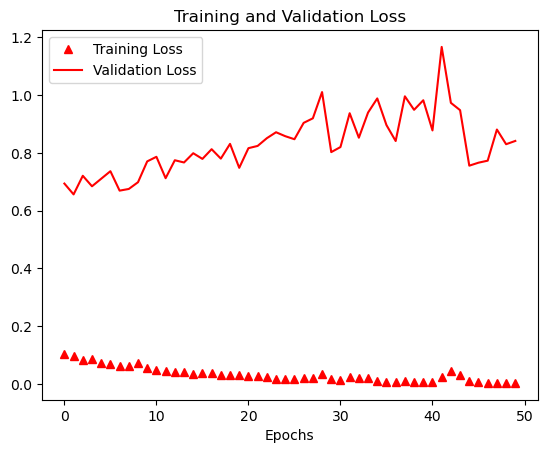

In [133]:
epochs=range(len(accuracy))

plt.plot(epochs,loss,'r^',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.legend()

In [134]:
# Predict the class probabilities for the test data
y_pred_prob = model.predict(X_test_gray_norm)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(y_pred_prob, axis=1)

# True labels
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [135]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)



<Axes: >

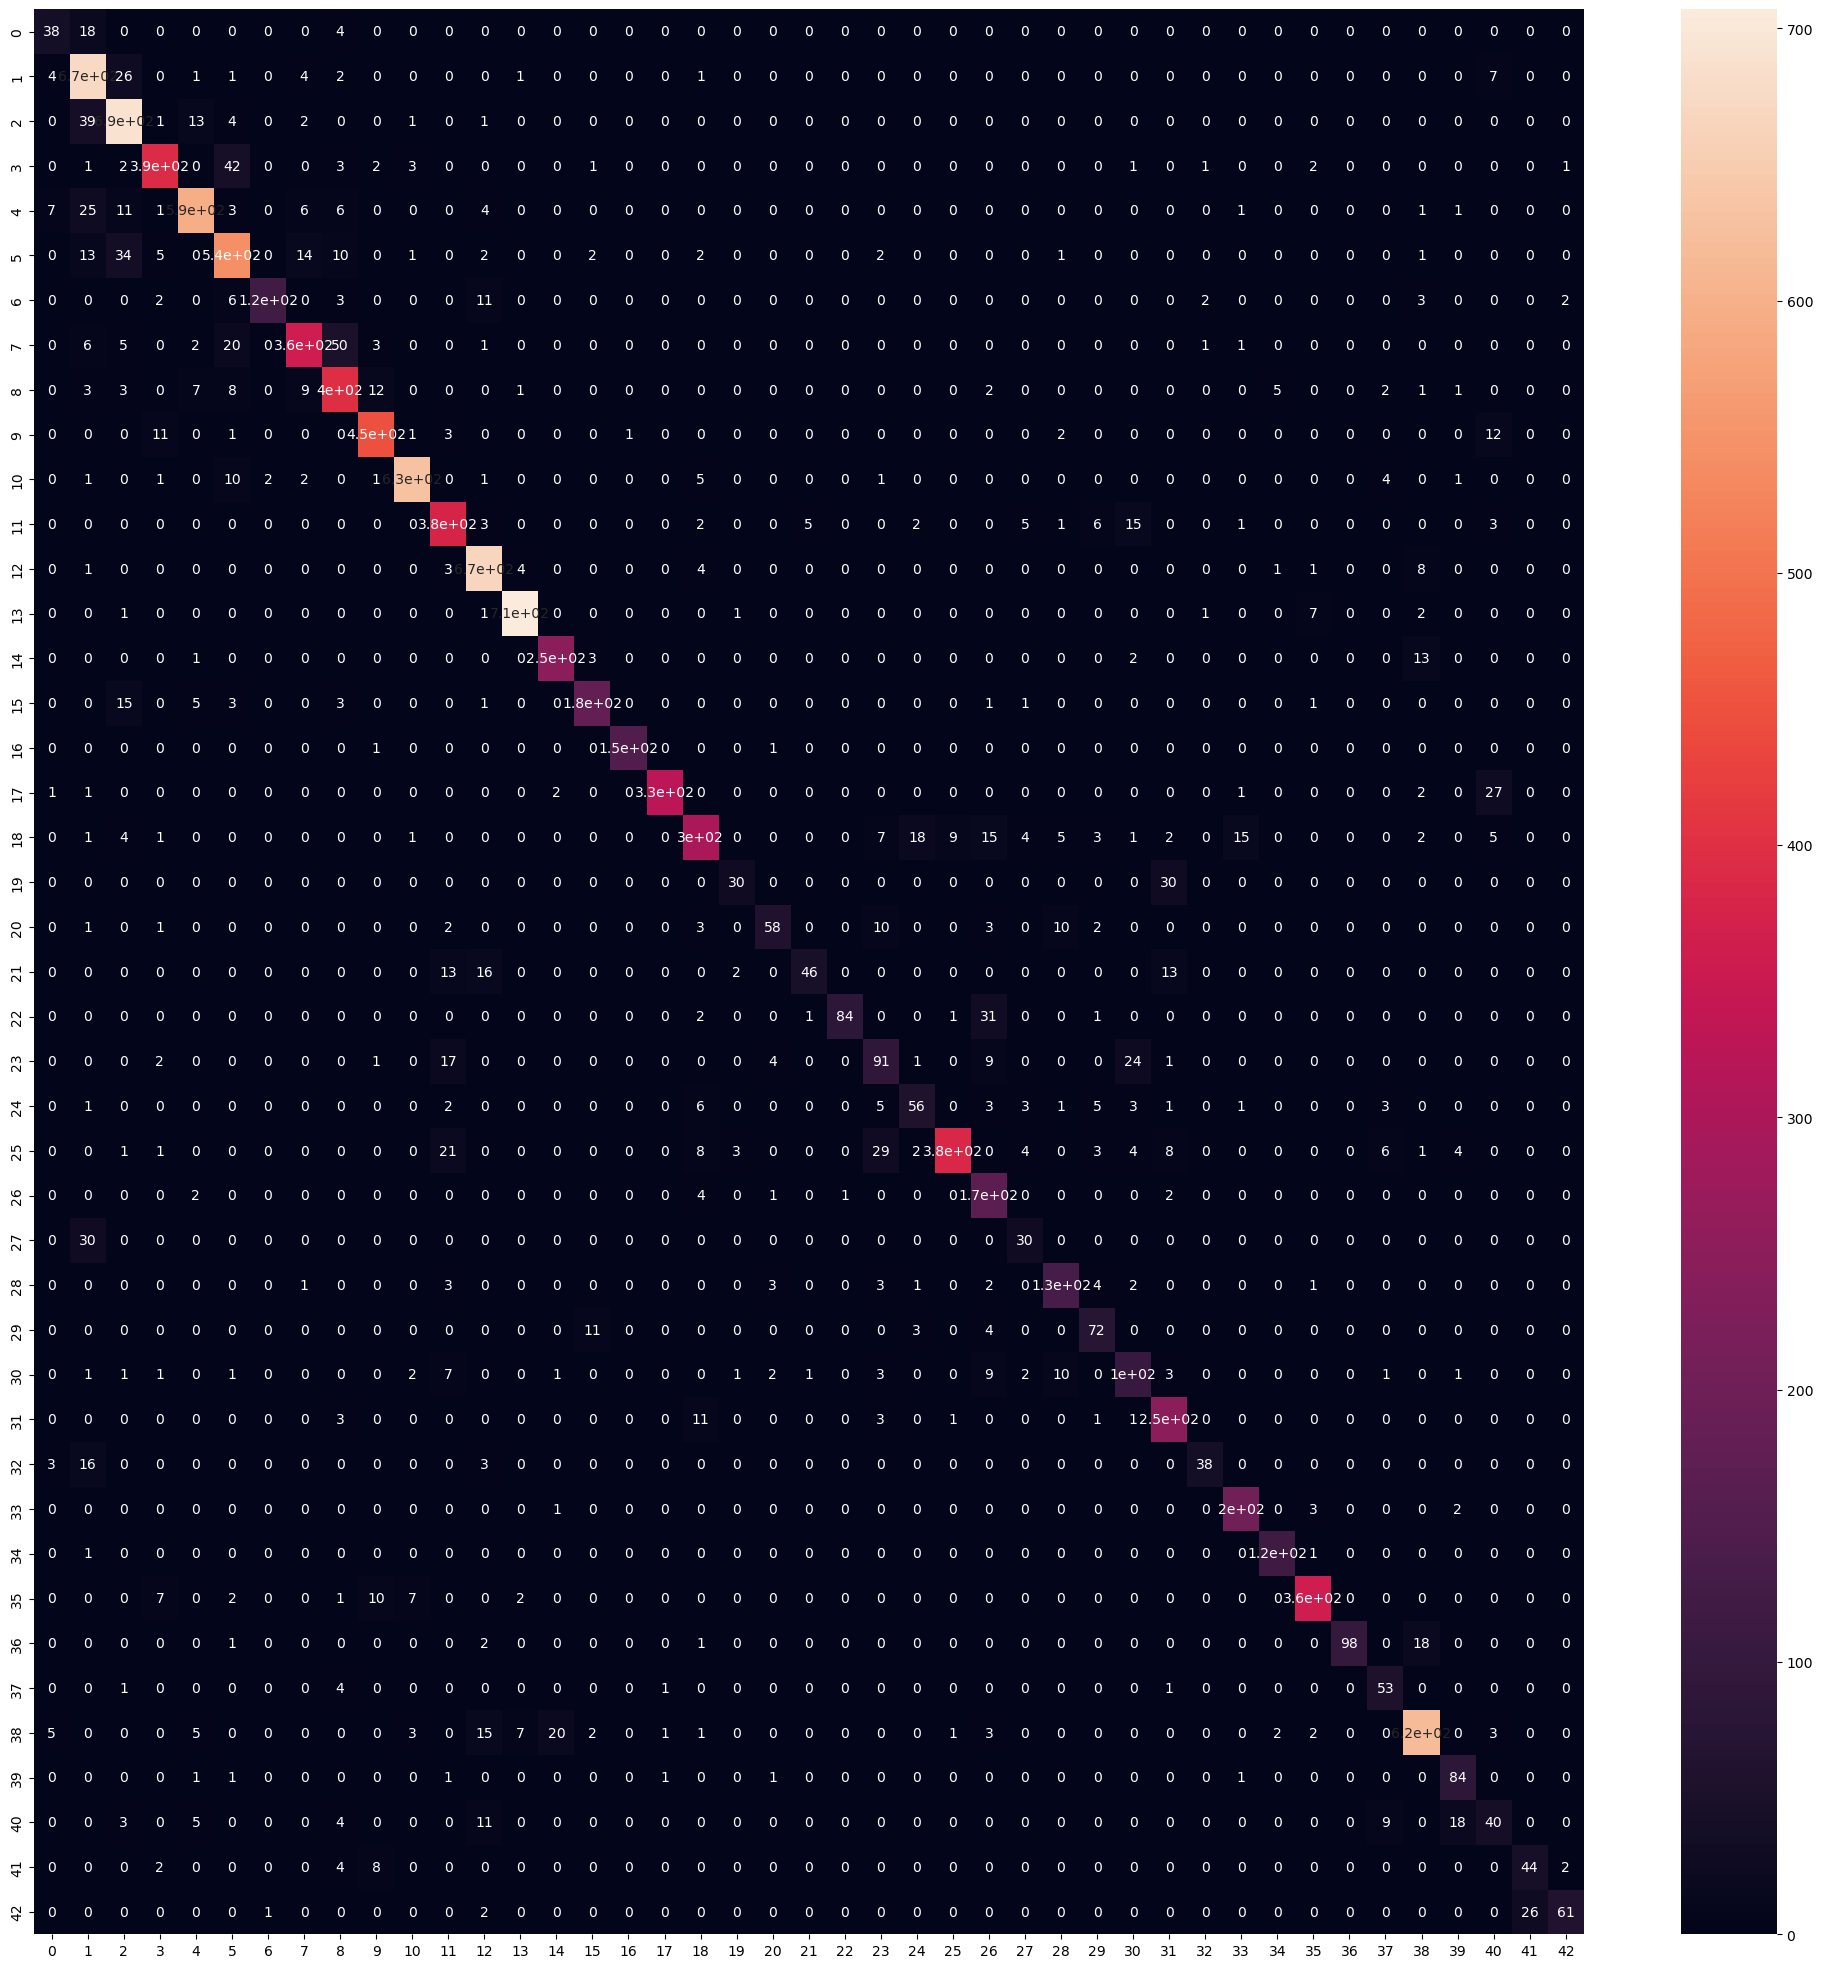

In [136]:
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

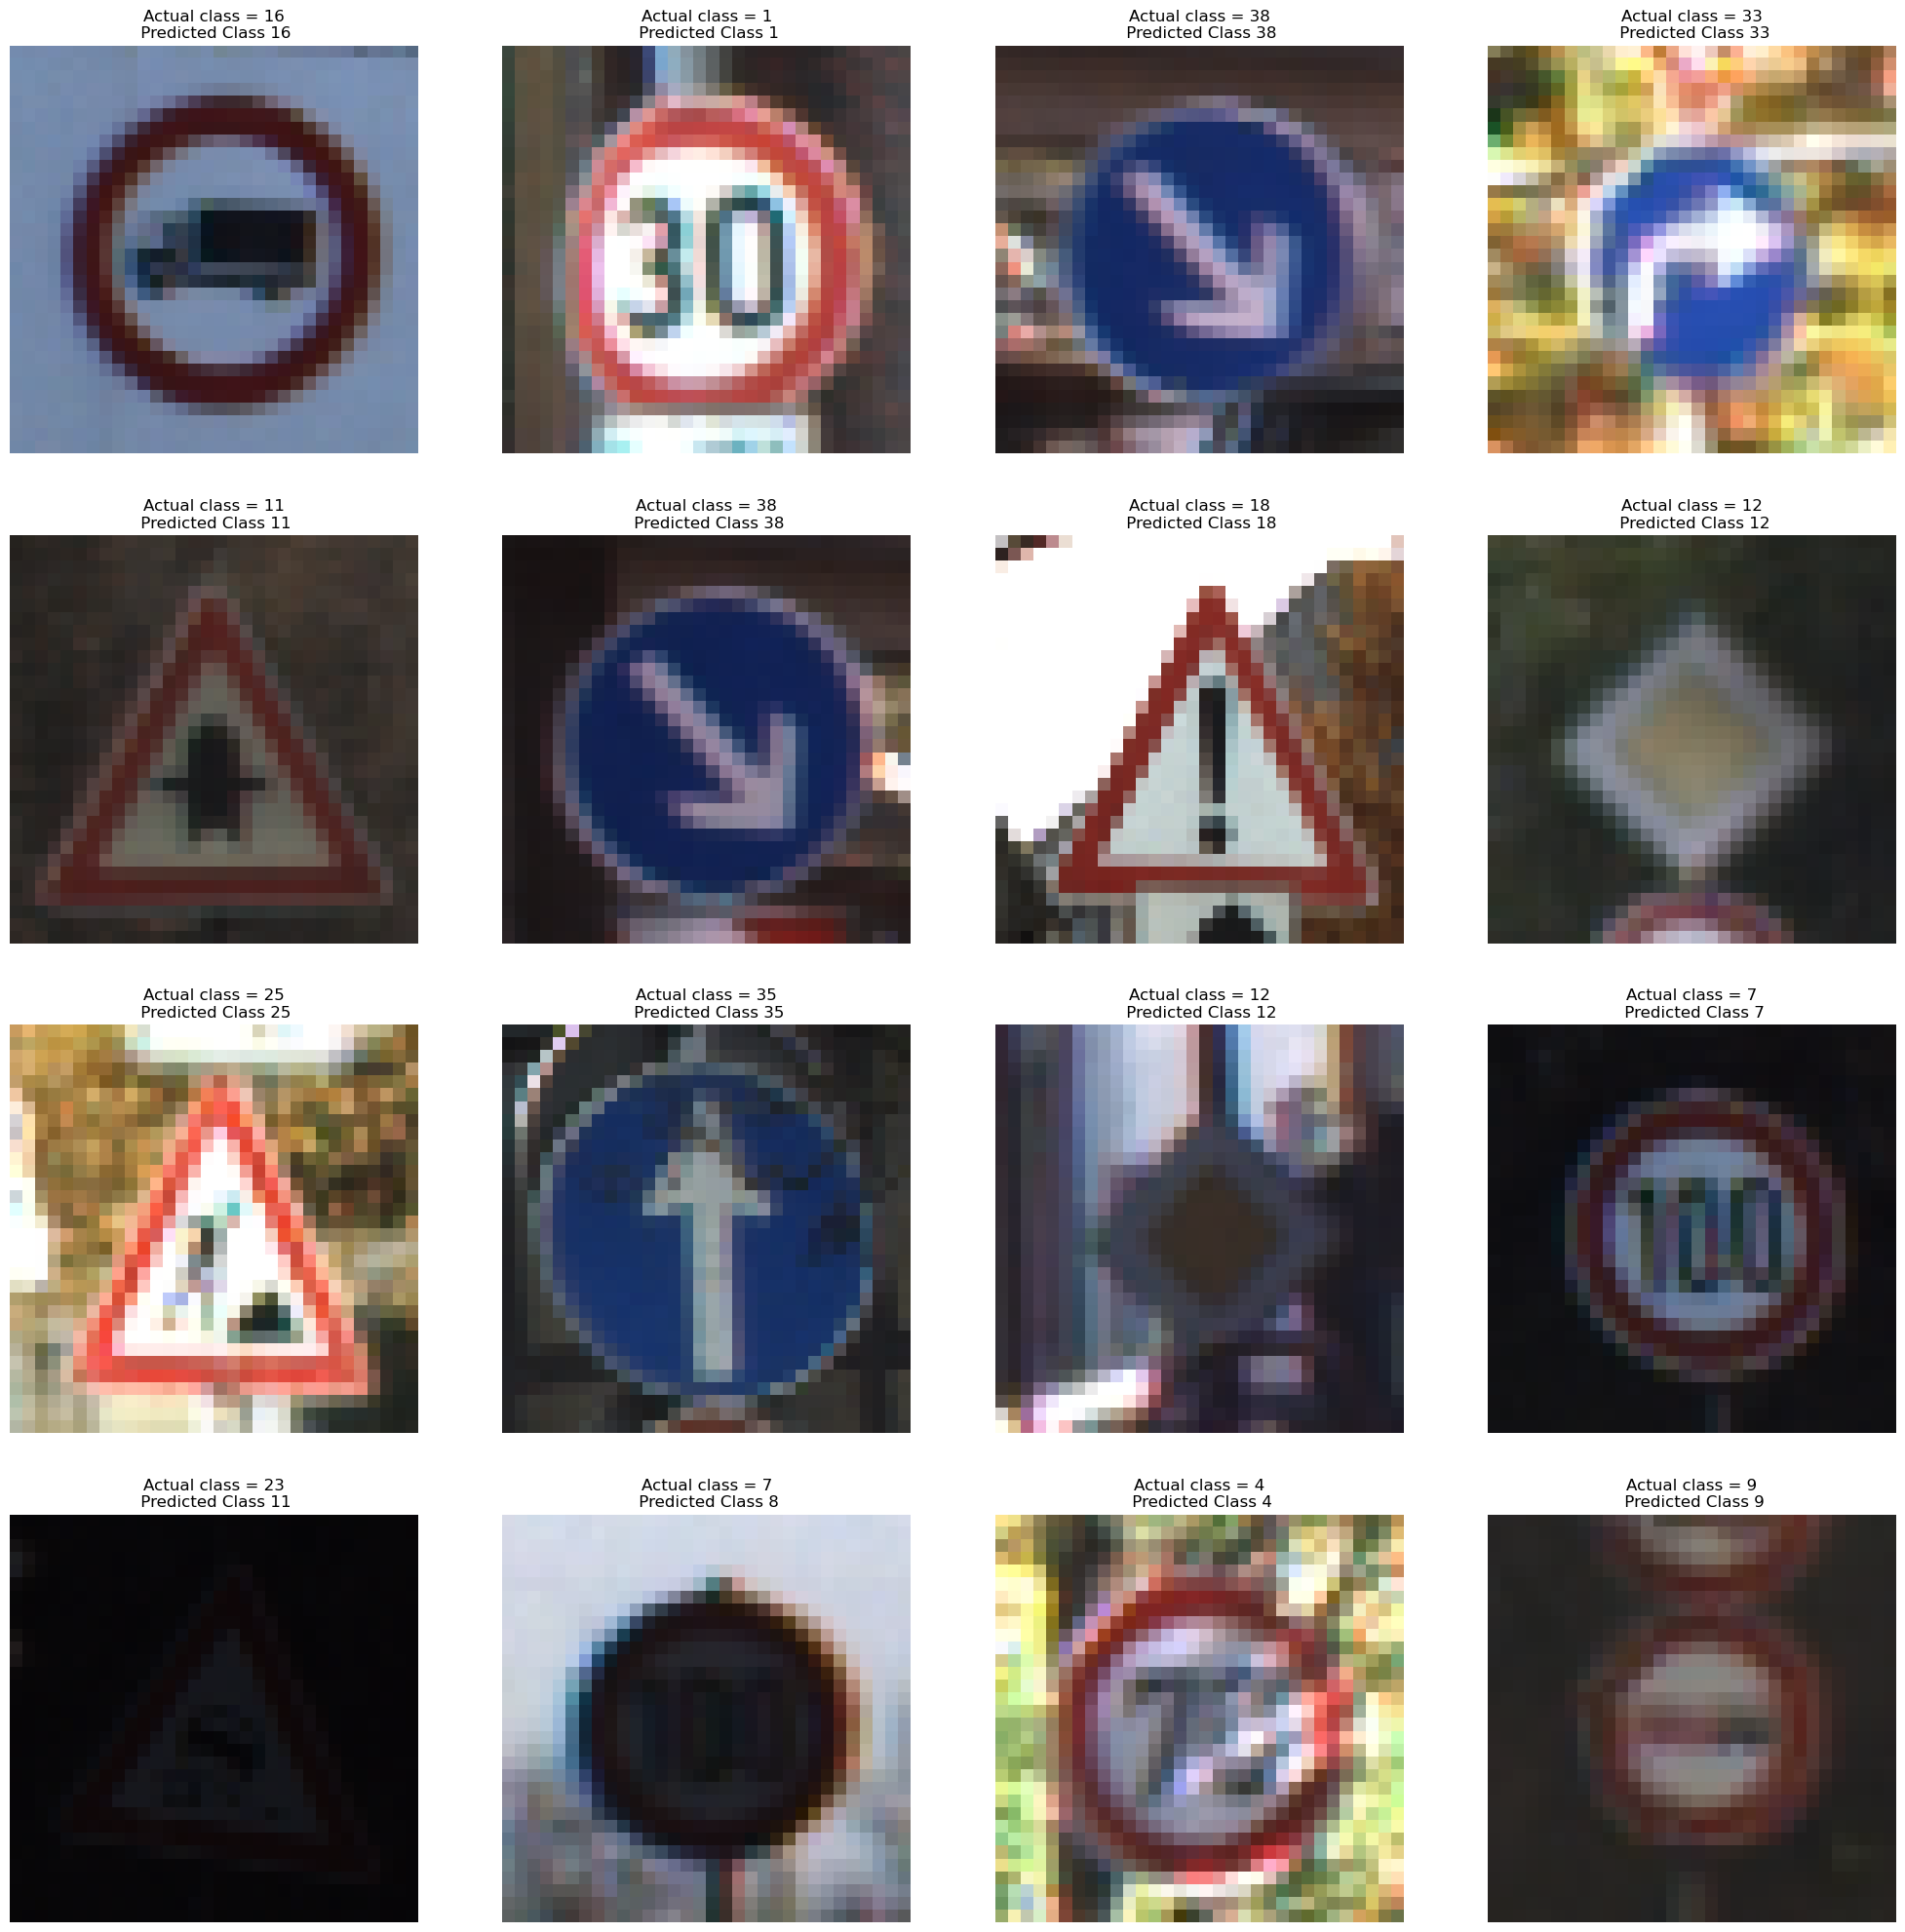

In [137]:

W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_test = len(X_test)

for i in np.arange(0, L_grid * W_grid):
    #index = np.random.randint(0, n_test) # pick a random number
    axes[i].imshow(X_test[i])
    axes[i].set_title("Actual class = {}\n Predicted Class {}".format(y_test[i],predicted_classes[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.2)

# Thats it!